In [2]:
import pandas as pd
import numpy as np

In [3]:
data='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
!wget $data

--2025-10-08 13:33:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-10-08 13:33:07 (24.5 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [5]:
df=pd.read_csv('car_fuel_efficiency.csv')

In [6]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
# Data Preparation

In [8]:
strings =list(df.dtypes[df.dtypes=='object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [9]:
for column in strings:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [10]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [11]:
# EDA

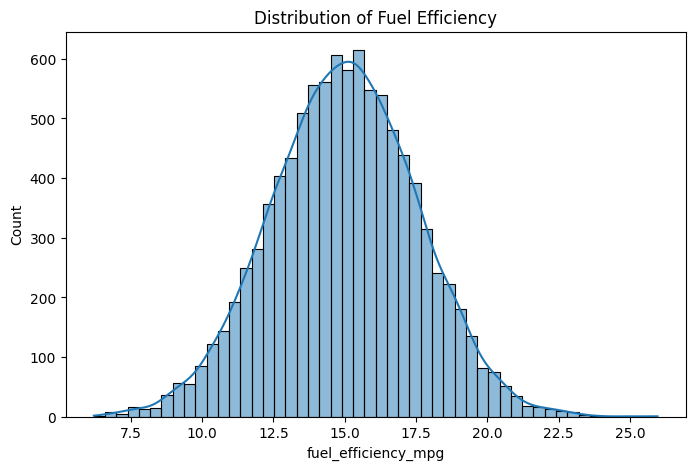

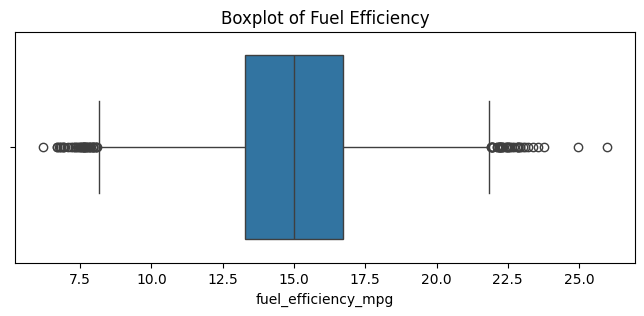

In [12]:
#Distribution of target variable "fuel_efficiency_mpg"
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['fuel_efficiency_mpg'], bins=50, kde=True)
plt.title("Distribution of Fuel Efficiency")
plt.show()

# Boxplot
plt.figure(figsize=(8,3))
sns.boxplot(x=df['fuel_efficiency_mpg'])
plt.title("Boxplot of Fuel Efficiency")
plt.show()


In [13]:
from scipy.stats import skew

skewness = skew(df['fuel_efficiency_mpg'], nan_policy='omit')
print("Skewness:", skewness)


Skewness: -0.012060354670679114


In [14]:
'''The distribution of the target variable final_price shows a skewness of –0.012, indicating it is approximately symmetric and does not exhibit a long tail. 
Therefore, no transformation was applied'''

'The distribution of the target variable final_price shows a skewness of –0.012, indicating it is approximately symmetric and does not exhibit a long tail. \nTherefore, no transformation was applied'

In [15]:
features=['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df_selected= df[features]

In [16]:
nullable_columns = df_selected.isnull().sum() >= 1
df_selected.columns[nullable_columns].to_list() 

['horsepower']

In [1]:
#Question 1
#There's one column with missing values. What is it?

#'engine_displacement'
#'horsepower'
#'vehicle_weight'
#'model_year'
'''horsepower'''

In [17]:
df_selected['horsepower'].median()

np.float64(149.0)

In [ ]:
#What's the median (50% percentile) for variable 'horsepower'?
#49
#99
#149
#199
'''149'''

In [21]:
n=len(df_selected)

In [25]:
# Setting the seed and creating the indices
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [26]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [27]:
df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_selected.iloc[idx[n_train:n_train + n_test]].reset_index(drop=True)
df_test = df_selected.iloc[idx[n_train + n_test:]].reset_index(drop=True)

In [30]:
# Setting the target variable vector
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [31]:
# Deleting the target variable from the train, validation and testing dataframes
del df_train['fuel_efficiency_mpg'], df_val['fuel_efficiency_mpg'], df_test['fuel_efficiency_mpg']

In [32]:
#Linear Regression

In [42]:
def prepare_X(df_lr, strategy):
    if strategy not in ['zero', 'mean']:
        raise ValueError("Strategy must be either 'zero' or 'mean'")

    df_lr = df_lr.copy()

    if strategy == 'zero':
        # Fill NaN values with 0
        df_lr = df_lr.fillna(0)
    elif strategy == 'mean':
        # Fill NaN values with the mean of each numeric column
        df_lr = df_lr.fillna(df_lr.mean(numeric_only=True))

    X = df_lr.values
    return X

In [43]:
def train_linear_regression(X, y):
    ones_array = np.ones(len(X))
    X = np.column_stack([ones_array, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [44]:
# For computing the mean, use the training data only!
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [45]:
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
X_train_fill_zero = prepare_X(df_lr=df_train, strategy='zero')
X_train_fill_mean = prepare_X(df_lr=df_train, strategy='mean')
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
w0_zero, w_full_zero = train_linear_regression(X=X_train_fill_zero, y=y_train)
w0_mean, w_full_mean = train_linear_regression(X=X_train_fill_mean, y=y_train)
print(f"Filling with zero: w0={np.round(w0_zero, 2)}, w={np.round(w_full_zero, 2)}")
print(f"Filling with mean: w0={np.round(w0_mean, 2)}, w={np.round(w_full_mean, 2)}")
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
X_val_zero = prepare_X(df_lr=df_val, strategy='zero')
X_val_mean = prepare_X(df_lr=df_val, strategy='mean')
score_fill_zero = rmse(y=y_val, y_pred=w0_zero + X_val_zero.dot(w_full_zero))
score_fill_mean = rmse(y=y_val, y_pred=w0_mean + X_val_mean.dot(w_full_mean))

Filling with zero: w0=26.16, w=[ 0.    0.   -0.01  0.  ]
Filling with mean: w0=26.19, w=[ 0.    0.01 -0.01  0.  ]


In [46]:
# Round the RMSE scores to 2 decimal digits using round(score, 2).
score_fill_zero = np.round(score_fill_zero, 2)
score_fill_mean = np.round(score_fill_mean, 2)

print(f"{score_fill_zero=}") 
print(f"{score_fill_mean=}")

score_fill_zero=np.float64(0.52)
score_fill_mean=np.float64(0.47)


In [ ]:
# Which option gives better RMSE?
# - With 0
# - With mean
# - Both are equally good
''' Filling with mean has a lower RMSE, hence it is better'''

In [48]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTXI = np.linalg.inv(XTX)
    w = XTXI.dot(X.T).dot(y)
    return w[0], w[1:]

In [49]:
X_train = prepare_X(df_lr=df_train, strategy='zero')
X_val = prepare_X(df_lr=df_val, strategy='zero')
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
r = [0, 0.01, 0.1, 1, 5, 10, 100]
rmses = {}
for alpha in r:
    w0, w = train_linear_regression_reg(X=X_train, y=y_train, r=alpha)
    rmses[alpha] = rmse(y=y_val, y_pred=w0 + X_val.dot(w))
# Use RMSE to evaluate the model on the validation dataset.
sorted_rmses = {key: np.round(value, 2) for key, value in sorted(rmses.items(), key=lambda item: item[1])}

sorted_rmses  


{0: np.float64(0.52),
 0.01: np.float64(0.52),
 0.1: np.float64(0.53),
 1: np.float64(0.53),
 5: np.float64(0.53),
 10: np.float64(0.53),
 100: np.float64(0.53)}

In [ ]:
# Which r gives the best RMSE?
# - 0
# - 0.01
# - 1
# - 10
# - 100
''' 1'''

In [ ]:
# %% Question 5
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

In [51]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = {}
target_variable = 'fuel_efficiency_mpg'
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    # Use the same code as in the lectures.
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val + n_test)

    # Setting the values via indices and resetting the index
    df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_selected.iloc[idx[n_train:n_train + n_test]].reset_index(drop=True)
    df_test = df_selected.iloc[idx[n_train + n_test:]].reset_index(drop=True)

    # Setting the target variable vector
    y_train = df_train[target_variable].values
    y_val = df_val[target_variable].values
    y_test = df_test[target_variable].values

    # Deleting the target variable from the train, validation and testing dataframes
    del df_train[target_variable], df_val[target_variable], df_test[target_variable]

    # Fill the missing values with 0 and train a model without regularization.
    X_train = prepare_X(df_lr=df_train, strategy='zero')
    w0, w = train_linear_regression(X=X_train, y=y_train)

    X_val = prepare_X(df_lr=df_val, strategy='zero')
    y_pred = w0 + X_val.dot(w)
    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    score = rmse(y=y_val, y_pred=y_pred)
    scores[seed] = score

# What's the standard deviation of all the scores?
# To compute the standard deviation, use np.std.
score_values = [x for x in scores.values()]
# Round the result to 3 decimal digits (round(std, 3)).
score_std_dev = np.std(score_values).round(3)
print(f"{score_std_dev=}") 

score_std_dev=np.float64(0.008)


In [ ]:
# What's the value of std?
#0.001
#0.006
#0.060
#0.600

'''0.006'''

In [52]:
# %% Question 6
# Split the dataset like previously, use seed 9.
np.random.seed(9)
# Combine train and validation datasets.
df_full = pd.concat([df_train, df_val])
y_full = np.concatenate([y_train, y_val])

# Fill the missing values with 0 and train a model with r=0.001.
X_full = prepare_X(df_lr=df_full, strategy='zero')
w0, w = train_linear_regression_reg(X=X_full, y=y_full, r=0.001)

X_test = prepare_X(df_lr=df_test, strategy='zero')

test_rmse = rmse(y=y_test, y_pred=w0 + X_test.dot(w))
print(f"{test_rmse=}")

test_rmse=np.float64(0.5287327513626651)


In [ ]:
# What's the RMSE on the test dataset?
#0.15
#0.515
#5.15
#51.5
'''0.515'''